# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# Read the data from csv file
df = pd.read_csv('D:/Documents/UpgradeAIML/Module3/Assignment Linear Regression/day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of dataframe

df.shape

(730, 16)

In [5]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

# Finding
There are no missing / Null values either in columns or rows

In [9]:
# Duplicate Entries Validation in Dataset
df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [10]:
# re-verifying the shape of new dataframe

df_dup.shape

(730, 16)

# Insights
The shape after running the drop duplicate command is same as the original dataframe.Hence we can conclude that there were zero duplicate values in the dataset.

# Data Cleaning

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:
instant : Its only an index value
dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
We will save the new dataframe as df_new, so that the original dataset is preserved for any future analysis/validation

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [15]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
# check the head of the dataset

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Data Visualisation

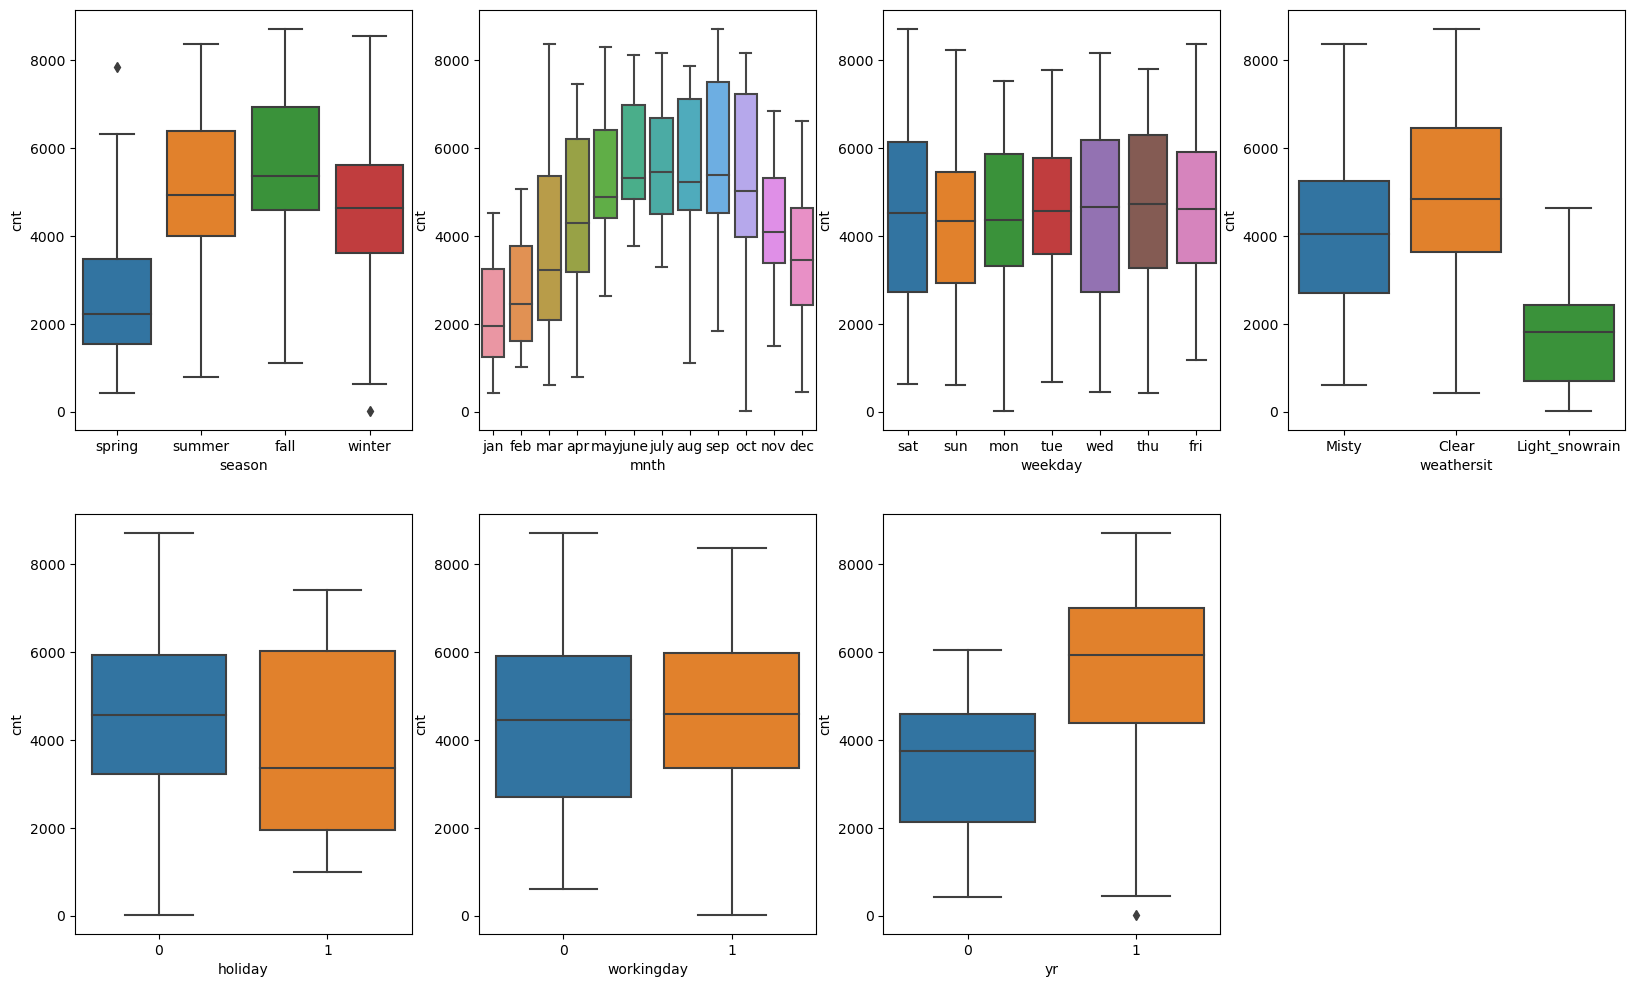

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

# Insights
There were 7 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by Summer & Winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘Clear weathersit' with a median of close to 5000 booking (for the period of 2 years). This was followed by misty with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

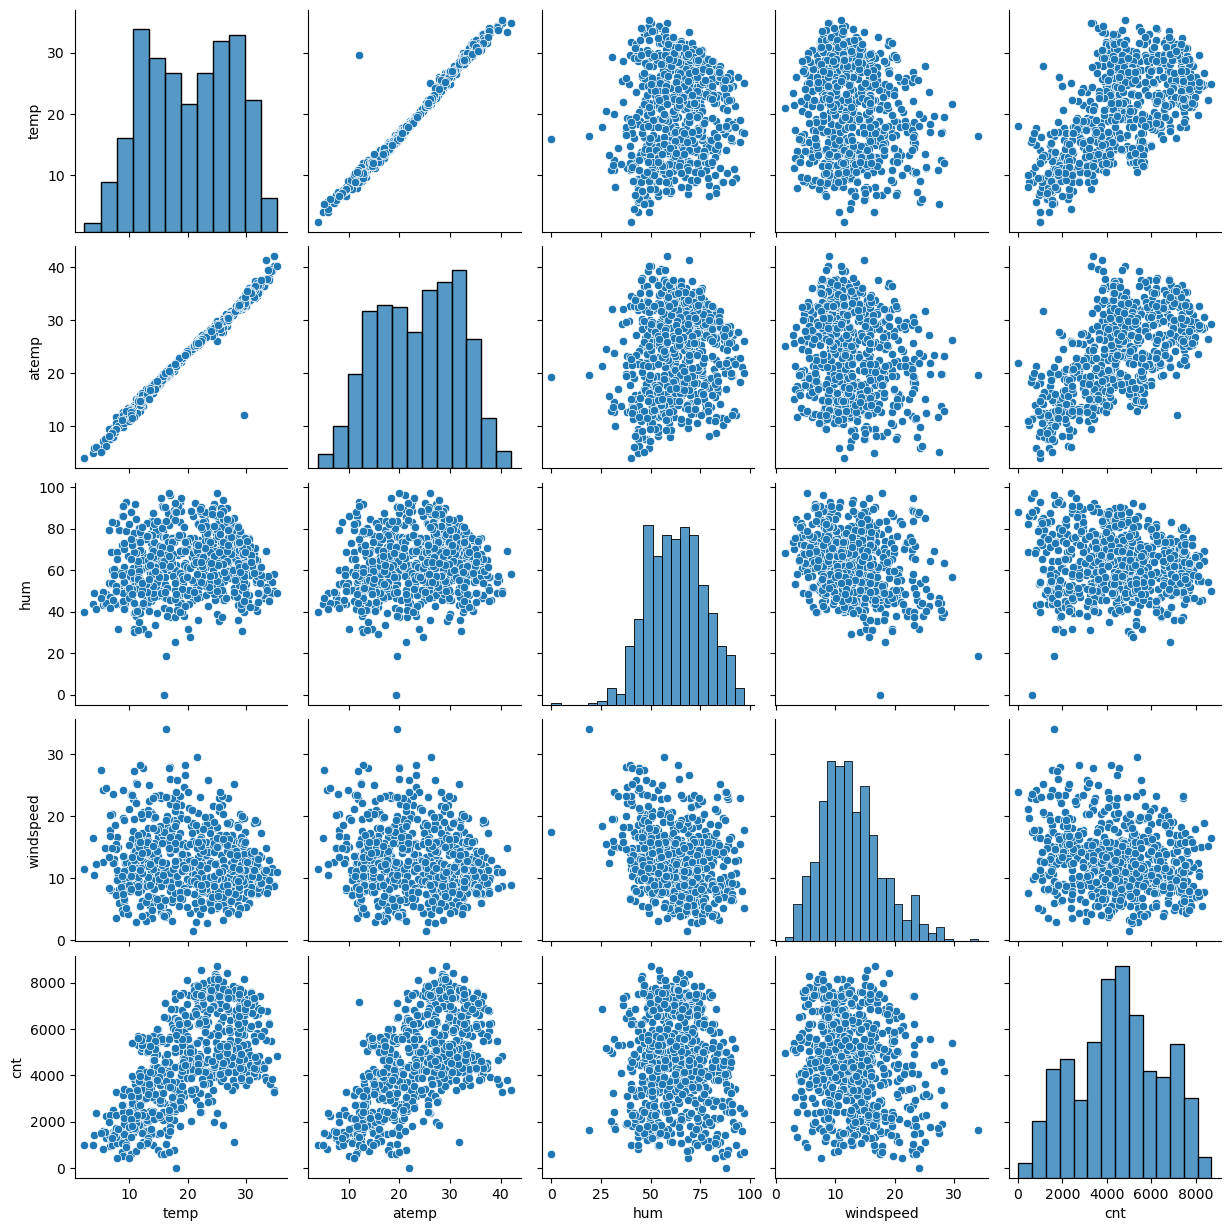

In [20]:
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

# Insight 
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' 'humidity' 'windspeed'and 'cnt'

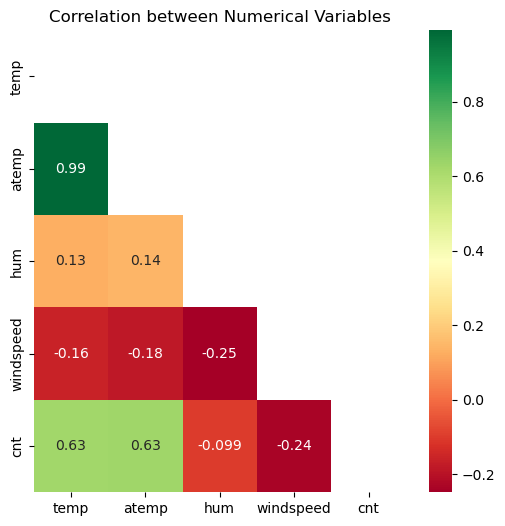

In [21]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()


There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Data Preparation

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
Before creating dummy variables, we will have to convert them into 'category' data types.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [23]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [26]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [28]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [29]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [30]:
df_new.shape

(730, 30)

# SPLITTING THE DATA
Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
We will use train_test_split method from sklearn package for this

In [31]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [32]:
df_train.shape

(510, 30)

In [33]:
df_test.shape

(219, 30)

In [34]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,1,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,1,...,0,1,0,0,0,0,1,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.098039,0.076471,...,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176,0.24902,0.247059,0.241176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.297660,0.266010,...,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570,0.43287,0.431725,0.428217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


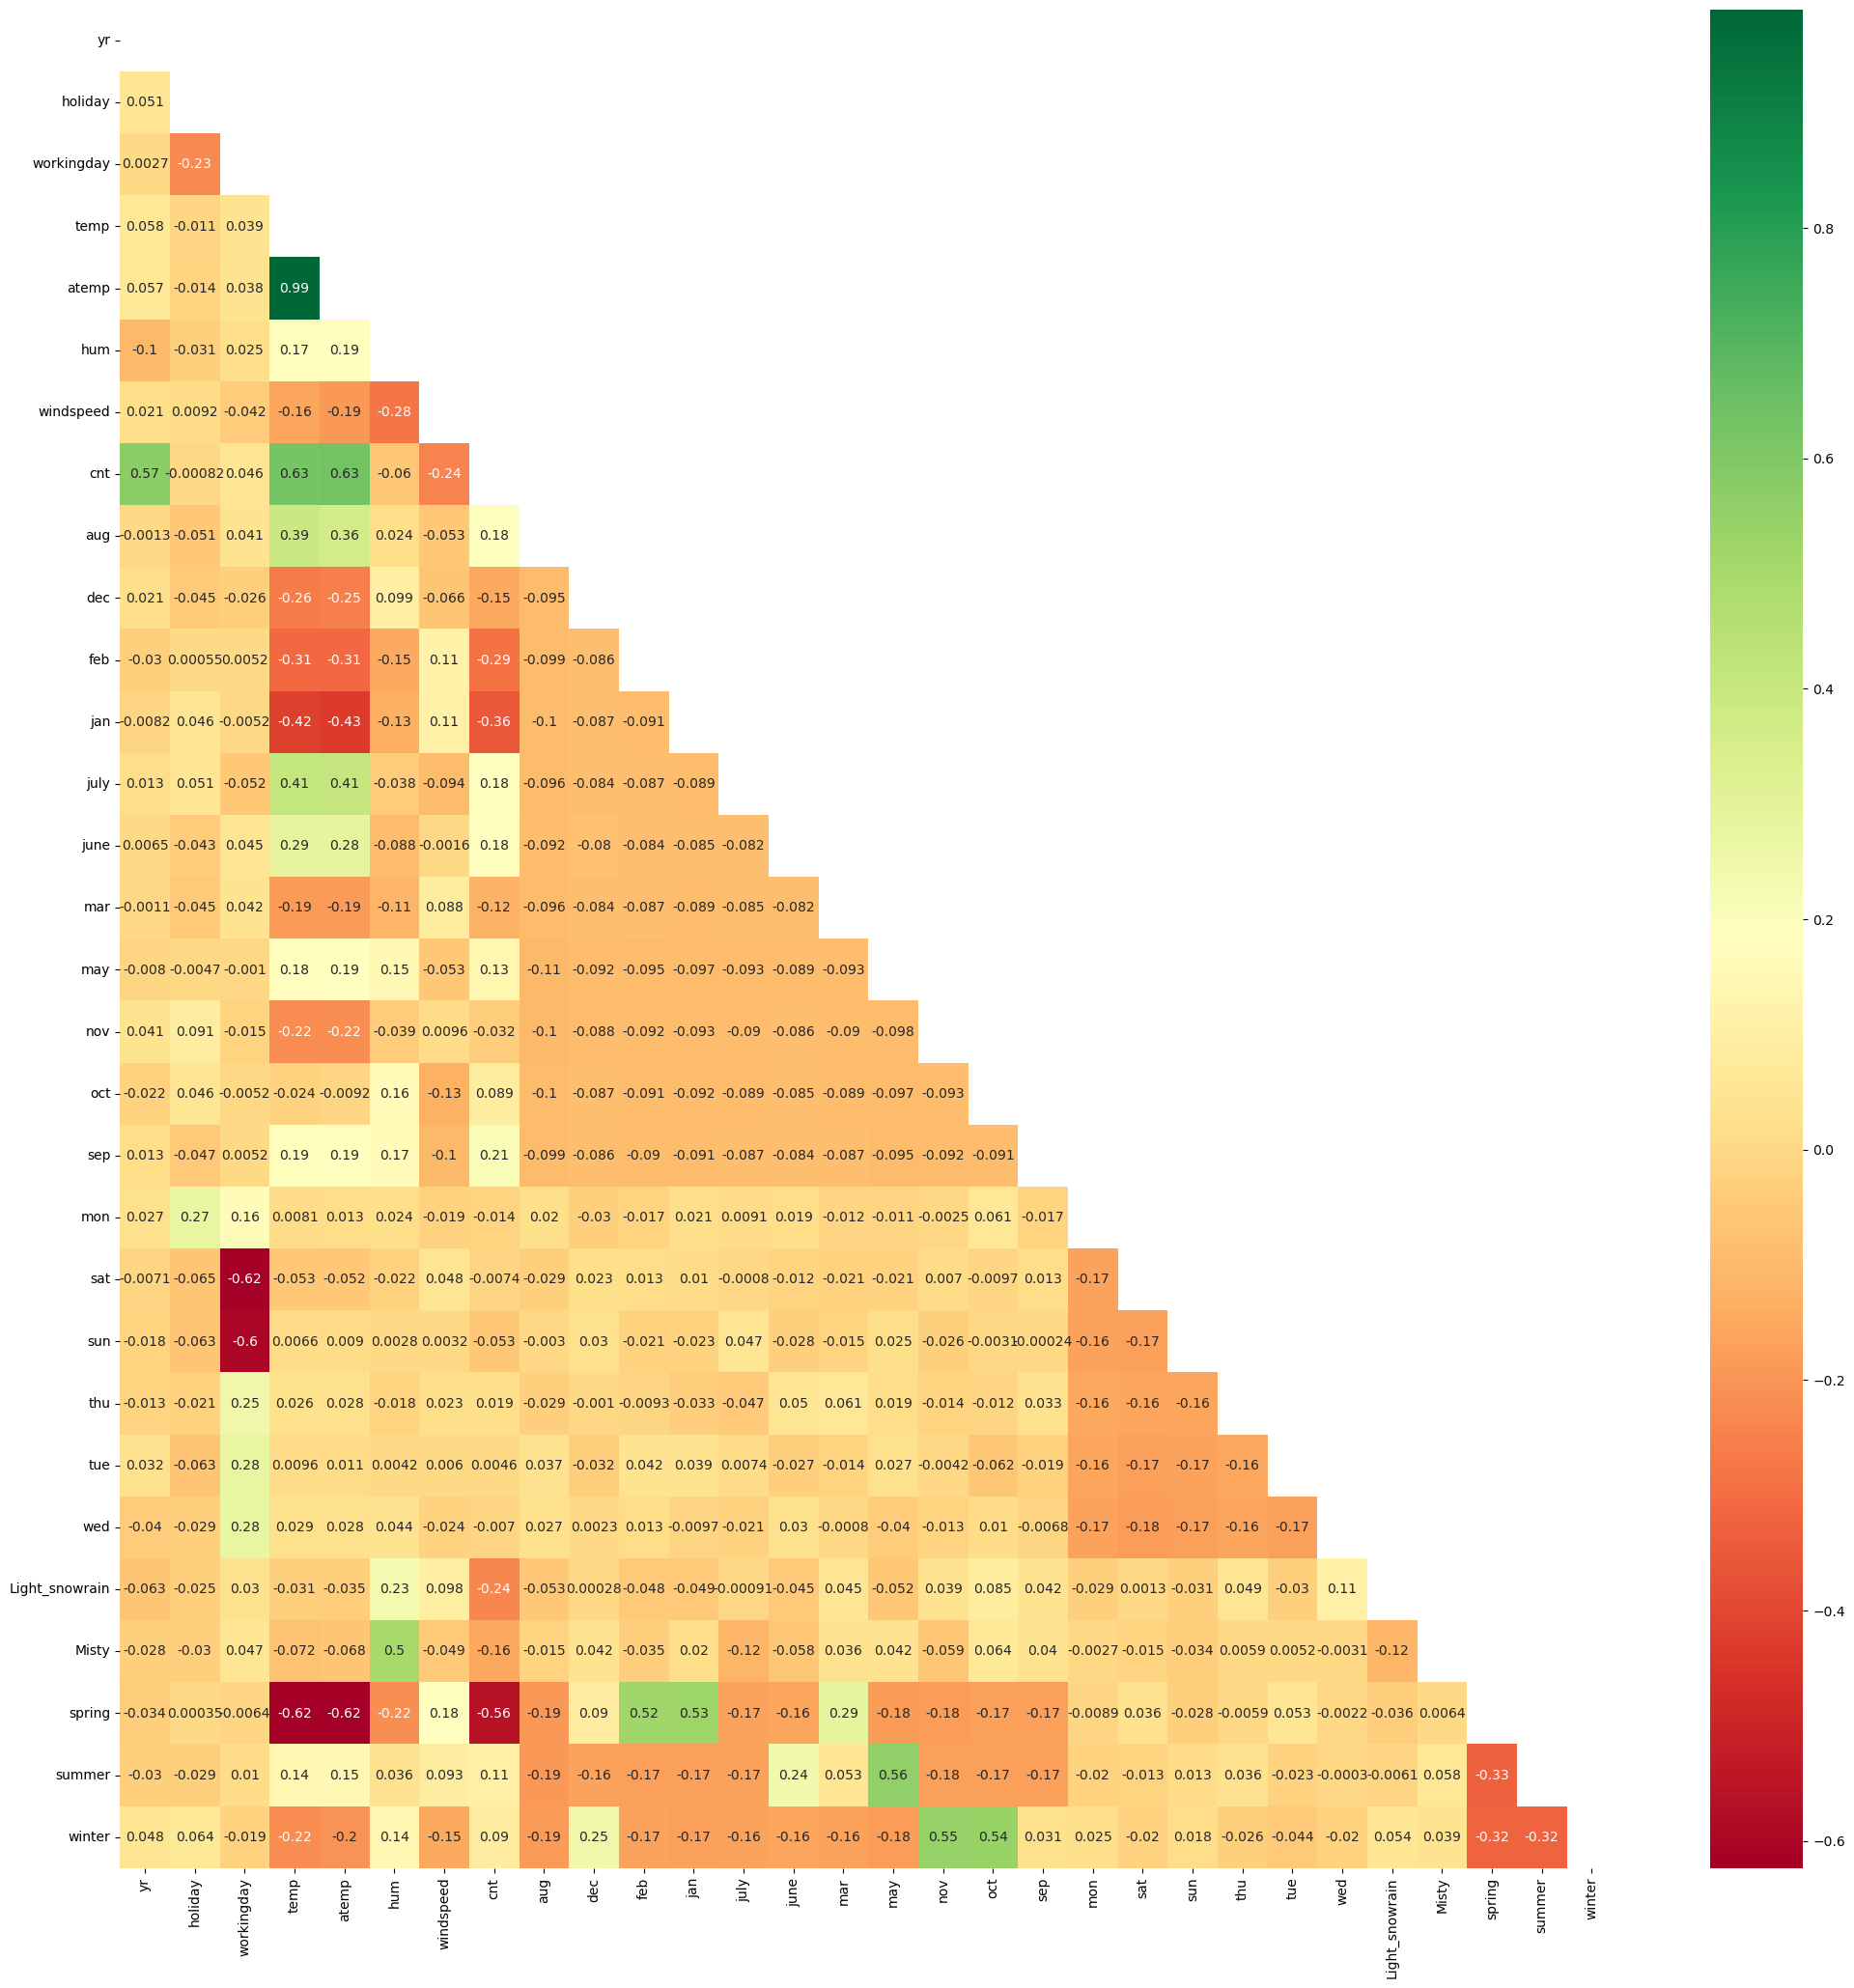

In [38]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

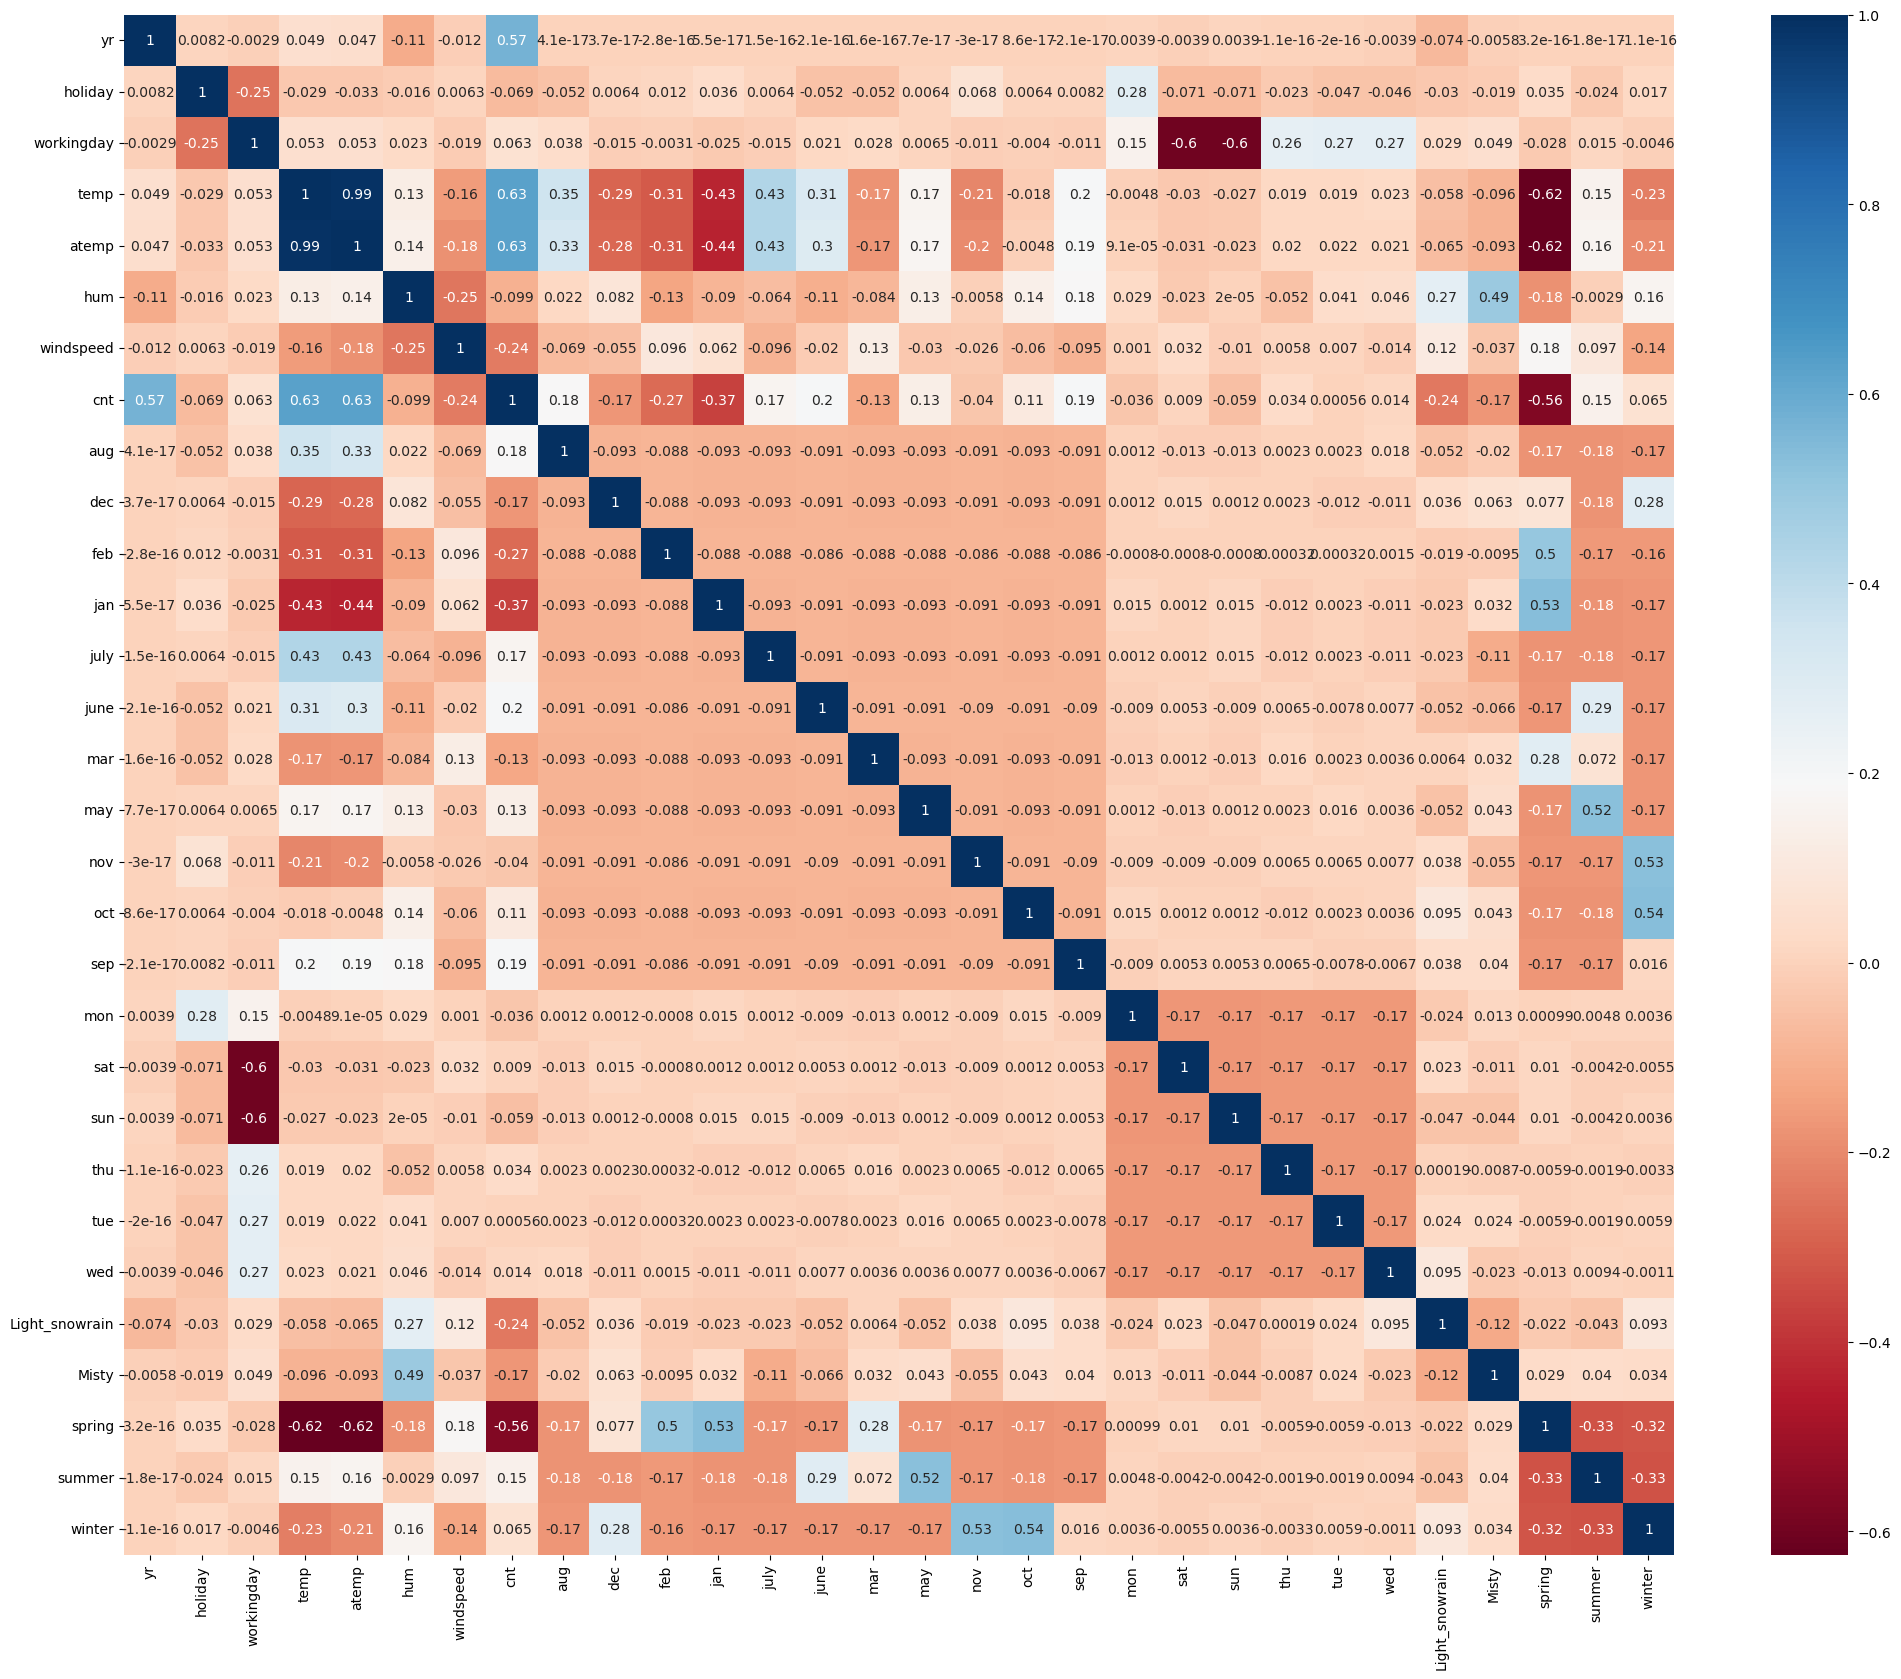

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(df_new.corr(), annot = True, cmap="RdBu")
plt.show()

# Insights:
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# BUILDING A LINEAR MODEL
Dividing into X and Y sets for the model building

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [41]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)


In [42]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', True, 1),
 ('feb', False, 7),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', True, 1),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 5),
 ('sat', False, 2),
 ('sun', False, 9),
 ('thu', False, 15),
 ('tue', False, 10),
 ('wed', False, 16),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'july', 'mar', 'nov',
       'sep', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [47]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [48]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'aug', 'feb', 'jan', 'june', 'may', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [49]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
1,temp,353.77
2,atemp,351.47
3,hum,22.80
4,windspeed,5.11
13,winter,2.75
12,spring,2.67
11,Misty,2.26
0,yr,2.05
8,nov,1.82
6,july,1.41


In [50]:
# selecting the selected variable via RFE in col list
X_train_new = X_train_rfe.drop(['hum'], axis = 1)
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'july', 'mar', 'nov',
       'sep', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


# Building Linear Model using 'STATS MODEL'

In [51]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.96e-184
Time:                        20:08:31   Log-Likelihood:                 500.17
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     495   BIC:                            -906.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3652      0.033     10.

In [52]:
# As temp shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp','atemp','hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,windspeed,2.77
10,winter,2.34
0,yr,1.85
5,nov,1.76
9,spring,1.72
8,Misty,1.46
2,dec,1.33
4,mar,1.22
6,sep,1.14
3,july,1.11


In [53]:
# Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          8.97e-151
Time:                        20:08:36   Log-Likelihood:                 413.26
No. Observations:                 510   AIC:                            -802.5
Df Residuals:                     498   BIC:                            -751.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5669      0.015     38.

In [54]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['winter'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,windspeed,2.72
0,yr,1.82
9,spring,1.61
8,Misty,1.42
4,mar,1.22
5,nov,1.15
6,sep,1.12
2,dec,1.11
3,july,1.10
7,Light_snowrain,1.07


In [55]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     166.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          7.20e-152
Time:                        20:08:41   Log-Likelihood:                 413.20
No. Observations:                 510   AIC:                            -804.4
Df Residuals:                     499   BIC:                            -757.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5684      0.014     40.

In [56]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,windspeed,2.62
0,yr,1.80
8,spring,1.58
7,Misty,1.42
3,mar,1.21
4,nov,1.14
2,dec,1.11
5,sep,1.11
6,Light_snowrain,1.07


In [57]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.08e-152
Time:                        20:08:46   Log-Likelihood:                 411.77
No. Observations:                 510   AIC:                            -803.5
Df Residuals:                     500   BIC:                            -761.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5751      0.014     42.

In [58]:
# We can drop mar variable as it has high p-value
X_train_new = X_train_new.drop(['mar'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,windspeed,2.60
0,yr,1.80
7,spring,1.46
6,Misty,1.42
3,nov,1.13
4,sep,1.11
2,dec,1.09
5,Light_snowrain,1.06


In [59]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     205.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.05e-152
Time:                        20:08:50   Log-Likelihood:                 409.71
No. Observations:                 510   AIC:                            -801.4
Df Residuals:                     501   BIC:                            -763.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5760      0.014     42.

# F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 205.1
Prob (F-statistic): 1.05e-152
The F-Statistics value of 205 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant


In [60]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.576036
yr                0.244477
windspeed        -0.192927
dec              -0.100031
nov              -0.119454
sep               0.075274
Light_snowrain   -0.324524
Misty            -0.084658
spring           -0.272605
dtype: float64

# The equation of best fitted surface based on model lr5:
cnt = 0.576036 + (yr × 0.244477) − (windspeed × 0.192927) - (mnth12 × 0.100031) - (mnth11 ×0.119454) + (mnth9 × 0.075274) - (Light_snowrain ×-0.324524) − (Misty × 0.084658) − (spring × 0.272605)

# Residual Analysis of the train data and validation

In [61]:
X_train_lm_5

,const,yr,windspeed,dec,nov,sep,Light_snowrain,Misty,spring
483,1.0,1,0.194850,0,0,0,0,0,0
650,1.0,1,0.255118,0,0,0,0,0,0
212,1.0,0,0.276919,0,0,0,0,0,0
714,1.0,1,0.161523,1,0,0,0,1,0
8,1.0,0,0.700017,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
467,1.0,1,0.274350,0,0,0,0,0,0
444,1.0,1,0.138467,0,0,0,0,1,0
46,1.0,0,0.472919,0,0,0,0,0,1
374,1.0,1,0.340487,0,0,0,0,0,1


In [62]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

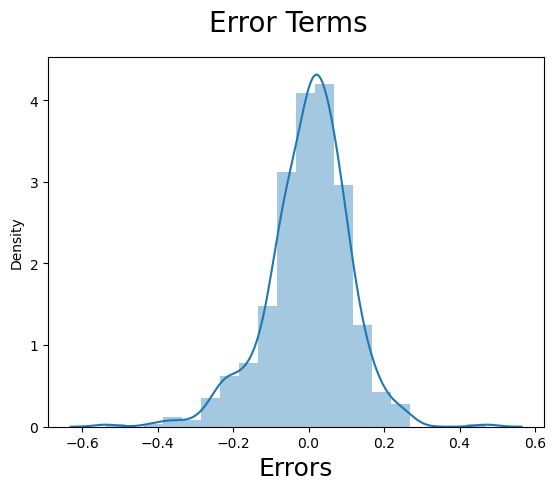

In [63]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

In [64]:
# Multi Colinearity

calculateVIF(X_train_new)

,Features,VIF
1,windspeed,2.60
0,yr,1.80
7,spring,1.46
6,Misty,1.42
3,nov,1.13
4,sep,1.11
2,dec,1.09
5,Light_snowrain,1.06


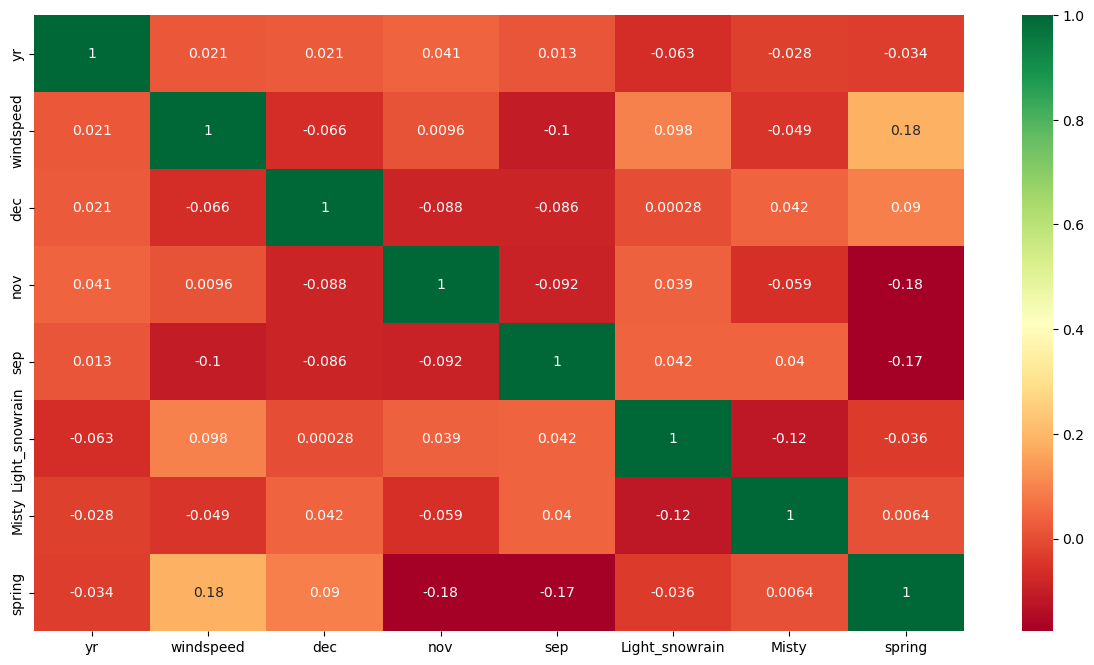

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

# VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

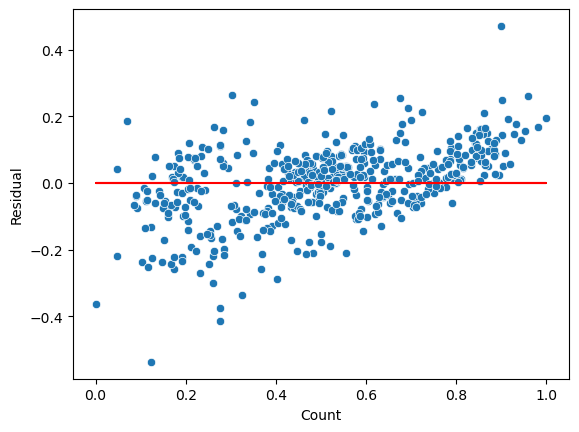

In [66]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

# Making Predictions Using the Final Model

In [67]:

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,1,0,0,0,0,0,1,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,0,...,1,0,0,0,0,0,0,0,1,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,1,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,0,...,0,1,0,0,0,0,0,0,1,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,1,...,0,0,0,1,0,0,1,0,0,1


In [68]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.054795,0.105023,...,0.127854,0.146119,0.173516,0.146119,0.118721,0.036530,0.324201,0.237443,0.264840,0.251142
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.228100,0.307285,...,0.334692,0.354034,0.379560,0.354034,0.324202,0.188034,0.469148,0.426491,0.442259,0.434663
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [72]:
y_pred = lr_5.predict(X_test_lm_5)

In [73]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.78

# Model Evaluation

Text(0, 0.5, 'y_pred')

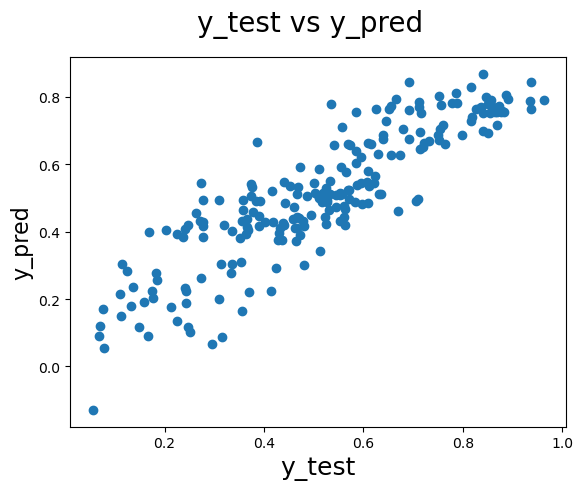

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [75]:
round(lr_5.params,4)

const             0.5760
yr                0.2445
windspeed        -0.1929
dec              -0.1000
nov              -0.1195
sep               0.0753
Light_snowrain   -0.3245
Misty            -0.0847
spring           -0.2726
dtype: float64

In [76]:
# lr5 model coefficient values as shown above
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7716


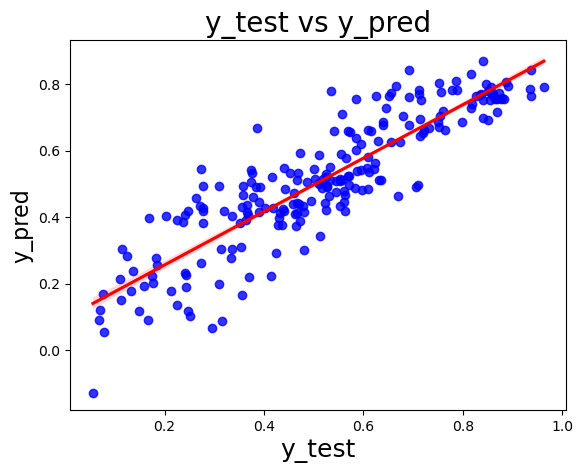

In [77]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


Demand of bikes depend on year, windspeed, dec ,nov, sep, Light_snowrain, Misty, spring, winter.
yr                0.2445 windspeed        -0.1929 dec              -0.1000 nov              -0.1195 sep               0.0753
Light_snowrain   -0.3245 Misty            -0.0847 spring           -0.2726 

# Conclusion 
As per our final Model, the top 3 predictor variables that influences the bike booking are:

1. Year (yr) - A coefficient value of ‘0.2445’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2445 units
2. windspeed - A coefficient value of ‘-0.1929’ indicated that, w.r.t windspeed, a unit increase in windspeed variable decreases the bike hire numbers by 0.1929 units.
3. spring - A coefficient value of ‘-0.2726’ indicated that, w.r.t spring, a unit increase in spring variable decreases the bike hire numbers by 0.2726 units.
4. Light_snowrain- A coefficient value of ‘-0.3245’ indicated that, w.r.t Light_snowrain, a unit increase in Light_snowrain variable decreases the bike hire numbers by 0.3245 units
5. Misty- A coefficient value of ‘-0.0847’ indicated that, w.r.t Misty, a unit increase in Misty variable decreases the bike hire numbers by 0.0847 units
6. Month of SEP, NOV,DEC A coefficient value of DEC: ‘-0.1000’,NOV: '-0.1195' SEP: '-0.0753' indicated that, w.r.t respective month, a unit increase in these month variable decreases the bike hire numbers by DEC: ‘0.1000’,NOV: '0.1195' SEP: '0.0753' units

So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
